In [4]:
import sqlite3
import pandas as pd

In [5]:
conn = sqlite3.connect('im.db')

In [6]:
df0 = pd.read_sql("""
select primary_title as movie, start_year, genres, region
from movie_basics
join movie_ratings
using (movie_id)
join movie_akas
using (movie_id)
group by movie
;
""", conn)
df0

,movie,start_year,genres,region
0,!Women Art Revolution,2010,Documentary,None
1,#1 Serial Killer,2013,Horror,None
2,#5,2013,"Biography,Comedy,Fantasy",US
3,#66,2015,Action,ID
4,#BKKY,2016,Drama,TH
...,...,...,...,...
65970,Üç Harfliler 3: Karabüyü,2016,Horror,TR
65971,"Üç, Iki, Bir... Kestik!",2014,Comedy,TR
65972,à propos: philosophie,2016,Documentary,DE
65973,ärtico,2014,Drama,None


In [7]:
df1 = pd.read_csv('tn.movie_budgets.csv')
df1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [8]:
df2 = df1.merge(df0, how='right', on='movie')


In [9]:
df3 = pd.read_csv('tmdb.movies.csv')
df3['movie'] = df3['title']
df3 = df3.drop(df3.columns[[0, 1, 2, 3, 4, 7]],axis = 1)

df4 = df3.merge(df2, how='left', on='movie')

df4['production_budget'] = df4['production_budget'].str.replace(',', '').str.replace('$', '')
df4['worldwide_gross'] = df4['worldwide_gross'].str.replace(',', '').str.replace('$', '')
df4['worldwide_profit'] = df4['worldwide_gross'].fillna(0).astype('int64') - df4['production_budget'].fillna(0).astype('int64')

df4 = df4.sort_values('worldwide_profit', ascending= False).drop_duplicates(subset=['movie'])

df5=df4.reset_index().head(10)

df5


C:\Users\bkokin\AppData\Local\Temp\ipykernel_6060\4046828030.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df4['production_budget'] = df4['production_budget'].str.replace(',', '').str.replace('$', '')
C:\Users\bkokin\AppData\Local\Temp\ipykernel_6060\4046828030.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df4['worldwide_gross'] = df4['worldwide_gross'].str.replace(',', '').str.replace('$', '')


,index,popularity,release_date_x,vote_average,vote_count,movie,id,release_date_y,production_budget,domestic_gross,worldwide_gross,start_year,genres,region,worldwide_profit
0,6,26.526,2009-12-18,7.4,18676,Avatar,1.0,"Dec 18, 2009",425000000,"$760,507,625",2776345279,2011.0,Horror,None,2351345279
1,23894,80.773,2018-04-27,8.3,13948,Avengers: Infinity War,7.0,"Apr 27, 2018",300000000,"$678,815,482",2048134200,2018.0,"Action,Adventure,Sci-Fi",None,1748134200
2,14242,20.709,2015-06-12,6.6,14056,Jurassic World,34.0,"Jun 12, 2015",215000000,"$652,270,625",1648854864,2015.0,"Action,Adventure,Sci-Fi",None,1433854864
3,14245,20.396,2015-04-03,7.3,6538,Furious 7,67.0,"Apr 3, 2015",190000000,"$353,007,020",1518722794,2015.0,"Action,Crime,Thriller",None,1328722794
4,5199,50.289,2012-05-04,7.6,19673,The Avengers,27.0,"May 4, 2012",225000000,"$623,279,547",1517935897,2012.0,"Action,Adventure,Sci-Fi",None,1292935897
5,3461,2.058,2011-01-18,5.1,11,Black Panther,42.0,"Feb 16, 2018",200000000,"$700,059,566",1348258224,2018.0,"Action,Adventure,Sci-Fi",None,1148258224
6,23914,34.958,2018-06-22,6.5,5995,Jurassic World: Fallen Kingdom,13.0,"Jun 22, 2018",170000000,"$417,719,760",1305772799,2018.0,"Action,Adventure,Sci-Fi",None,1135772799
7,7911,26.183,2013-11-27,7.3,9767,Frozen,56.0,"Nov 22, 2013",150000000,"$400,738,009",1272469910,2010.0,"Adventure,Drama,Sport",None,1122469910
8,20700,31.793,2017-03-17,6.9,11023,Beauty and the Beast,35.0,"Mar 17, 2017",160000000,"$504,014,165",1259199706,2014.0,"Drama,Fantasy,Romance",None,1099199706
9,14407,9.338,2015-07-10,6.4,7343,Minions,73.0,"Jul 10, 2015",74000000,"$336,045,770",1160336173,2015.0,"Adventure,Animation,Comedy",None,1086336173


C:\Users\bkokin\AppData\Local\Temp\ipykernel_6060\3755883607.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 30)


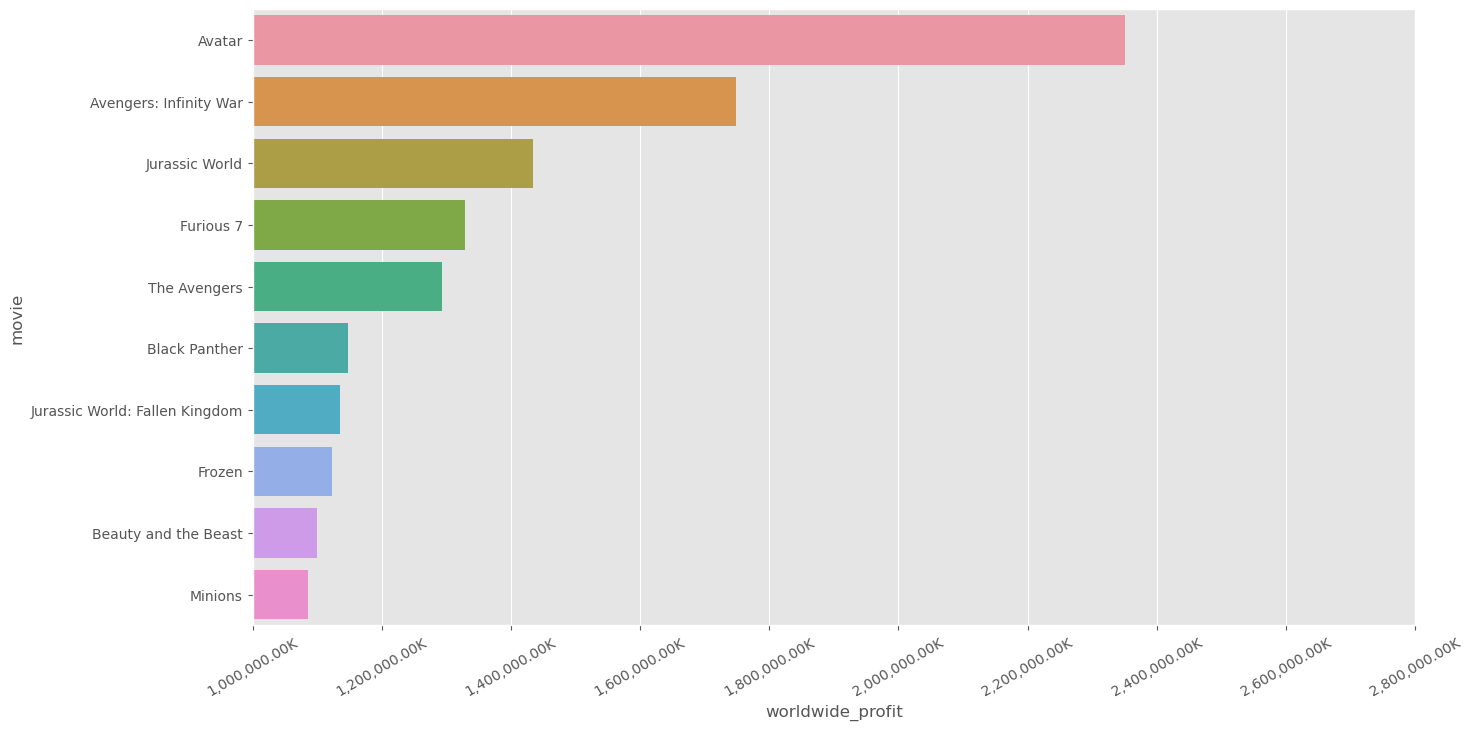

In [25]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(15,8))

ax = sns.barplot(data=df5, y='movie', x='worldwide_profit');

ax.set(xlim = (1000000000,2800000000))
xlabels = ['{:,.2f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels, rotation = 30)

plt.show()

In [2]:
cd ..

C:\Users\bkokin\flatiron\semester_1_capstone


In [3]:
cd ..

C:\Users\bkokin\flatiron


In [1]:
pwd

'C:\\Users\\bkokin\\flatiron\\semester_1_capstone\\exploratory_work'